In [36]:
# Import Data

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjust configuartion of plot we create

pd.options.mode.chained_assignment = None

# Read Data

df = pd.read_csv(r'C:\Users\Johnny Lee\Desktop\Data Analytics\Analytics Case Study\Python - Correlation\movies.csv')




In [37]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [49]:
# Checking for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))
    
# Drop missing data

df = df.dropna()

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%
yearcorrect - 0.0%


In [40]:
# Data types for all column

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [42]:
# Change data type for column

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [47]:
# Correct year column

df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [40]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [50]:
# Expand the limit of display result

## pd.set_option('display.max_rows', None)

In [52]:
# Drop any duplicates

## df['company'].drop_duplicates().sort_values(ascending=False) if want to drop specific column 

df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


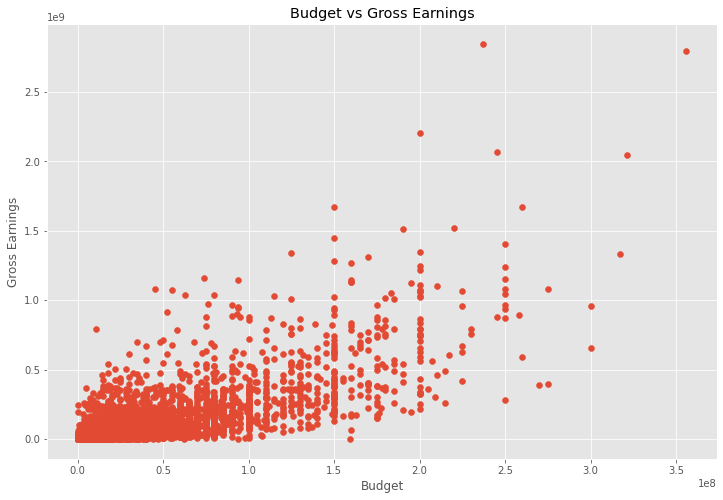

In [51]:
# Correlation "higher budget = higher gross"

# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Budget')
plt.ylabel('Gross Earnings')

plt.show()

In [15]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


<AxesSubplot:xlabel='budget', ylabel='gross'>

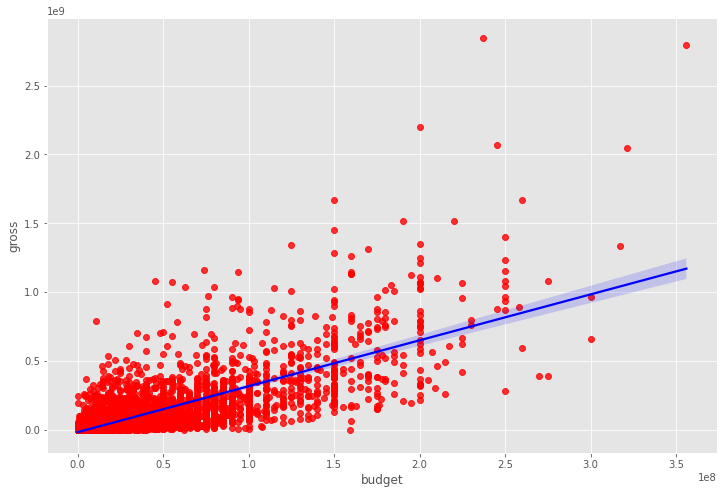

In [44]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

In [2]:
# Finding Correlation

# High correlation between gross and budget
df.corr(method='pearson') #Different type of Correlation (pearson, kendall, spearman)

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


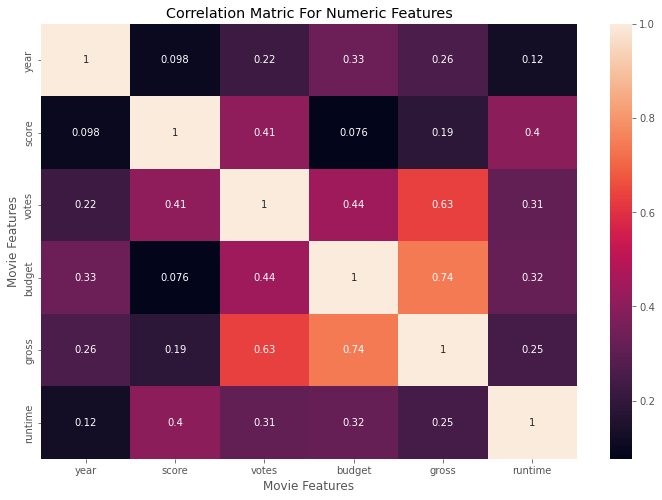

In [4]:
correlation_matrix = df.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matric For Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [17]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


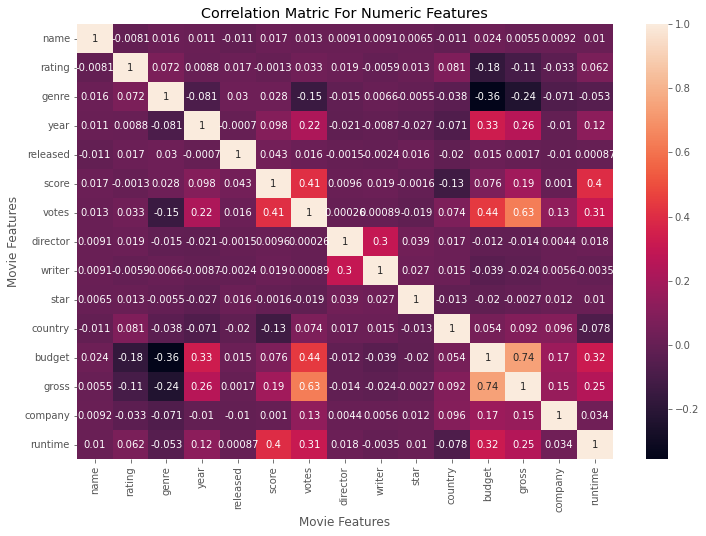

In [8]:
correlation_matrix = df_numerized.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matric For Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [14]:
# Correlation display

correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

sorted_pairs = corr_pairs.sort_values()

high_corr = sorted_pairs[(sorted_pairs) >0.5]

high_corr

gross     votes       0.630757
votes     gross       0.630757
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64